Deep learning optimizers are algorithms used to update the weights and biases of a neural network during training to minimize the loss function. Here are some common optimizers:

*   **SGD (Stochastic Gradient Descent):** A basic optimizer that updates weights based on the gradient of a small batch of data.
*   **Adam (Adaptive Moment Estimation):** An adaptive learning rate optimization algorithm that uses estimates of first and second moments of the gradients to adjust the learning rate for each parameter.
*   **RMSprop (Root Mean Square Propagation):** An adaptive learning rate optimization algorithm that divides the learning rate by a running average of the magnitudes of recent gradients.
*   **Adagrad (Adaptive Gradient Algorithm):** Adapts the learning rate to the parameters, performing larger updates for infrequent and smaller updates for frequent parameters.
*   **Adadelta:** An extension of Adagrad that seeks to reduce its aggressive reduction of the learning rate.
*   **Adamax:** A variant of Adam based on the infinity norm.
*   **Nadam (Nesterov-accelerated Adaptive Moment Estimation):** Adam with Nesterov momentum.

### SGD (Stochastic Gradient Descent)

**Simple Example:** Imagine you are trying to find the lowest point in a hilly landscape (the loss function). With SGD, you take small steps downhill based on the slope you see in your immediate vicinity (the gradient of a small batch).

**Best For:**
*   Simple problems and datasets.
*   When you want to understand the basics of optimization.
*   As a baseline to compare against more advanced optimizers.
*   Can sometimes find sharper minima, which might generalize better.

In [ ]:
# Example usage in Keras (conceptual)
# model.compile(optimizer='sgd', loss='...', metrics=['...'])
# model.fit(x_train, y_train, epochs=...)

### Adam (Adaptive Moment Estimation)

**Simple Example:** Think of Adam as having a memory of the past slopes (momentum) and also adjusting its step size based on how consistent the slope has been (adaptive learning rate). It takes larger steps when the slope is consistently steep and smaller steps when it's noisy or flat.

**Best For:**
*   A wide range of tasks, including image classification, natural language processing, and more.
*   Often the default choice and a good starting point because it tends to converge quickly and perform well without much hyperparameter tuning.
*   Problems with sparse gradients.

In [ ]:
# Example usage in Keras (conceptual)
# model.compile(optimizer='adam', loss='...', metrics=['...'])
# model.fit(x_train, y_train, epochs=...)

### RMSprop (Root Mean Square Propagation)

**Simple Example:** Similar to Adam, RMSprop also adapts the learning rate. It divides the learning rate by the square root of the average of squared gradients. This helps to normalize the gradients and prevent oscillations, especially in directions with large gradients.

**Best For:**
*   Recurrent Neural Networks (RNNs).
*   When dealing with non-stationary objectives (where the gradient direction changes frequently).
*   Can be a good alternative to Adam.

### Adagrad (Adaptive Gradient Algorithm)

**Simple Example:** Adagrad adapts the learning rate based on the historical sum of squared gradients for each parameter. Parameters with large gradients get a smaller learning rate, and parameters with small gradients get a larger learning rate.

**Best For:**
*   Problems with sparse data, where some features are much more frequent than others (e.g., natural language processing).
*   Can be effective when you have infrequent features.

In [ ]:
# Example usage in Keras (conceptual)
# model.compile(optimizer='adagrad', loss='...', metrics=['...'])
# model.fit(x_train, y_train, epochs=...)

### Adadelta

**Simple Example:** Adadelta is an improvement over Adagrad that addresses its aggressively decreasing learning rate. It uses a moving window of squared gradients rather than the sum of all historical squared gradients.

**Best For:**
*   Similar use cases as Adagrad but can be more robust.
*   When you need an adaptive learning rate without the need to set a learning rate manually.

In [ ]:
# Example usage in Keras (conceptual)
# model.compile(optimizer='adadelta', loss='...', metrics=['...'])
# model.fit(x_train, y_train, epochs=...)

### Adamax

**Simple Example:** Adamax is a variant of Adam that uses the infinity norm to scale the learning rate. This can be more stable in certain situations.

**Best For:**
*   When dealing with large parameter updates.
*   Can be a good alternative to Adam in specific cases.

In [ ]:
# Example usage in Keras (conceptual)
# model.compile(optimizer='adamax', loss='...', metrics=['...'])
# model.fit(x_train, y_train, epochs=...)

### Nadam (Nesterov-accelerated Adaptive Moment Estimation)

**Simple Example:** Nadam combines Adam with Nesterov momentum. Nesterov momentum looks ahead to where the gradient will be in the next step, which can lead to faster convergence.

**Best For:**
*   Often performs slightly better than Adam, especially in cases where momentum is beneficial.
*   Can be a good choice when you want a more advanced adaptive optimizer.

In [ ]:
# Example usage in Keras (conceptual)
# model.compile(optimizer='nadam', loss='...', metrics=['...'])
# model.fit(x_train, y_train, epochs=...)

In [1]:
# Import Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os


In [2]:
# Data Set - Mnist Data
# Mnist Data is the pixcel (28x28) image of 0 to 9 numbers written image in different ways

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [5]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
# Create and validate data set from the full training data
# scale the data between 0 to 1 by dividing it by 225, as its an unsigned data between 0-255 range
x_valid = X_train[:5000]/255.0  # last five thousand images
x_train = X_train[5000:]/255.0   # first five thousand images
y_valid = y_train[:5000]
y_train = y_train[5000:]

# scale the test set as well
x_test = X_test/255.0

In [11]:
# Train- 55000
# Test - 10000
# Val - 5000

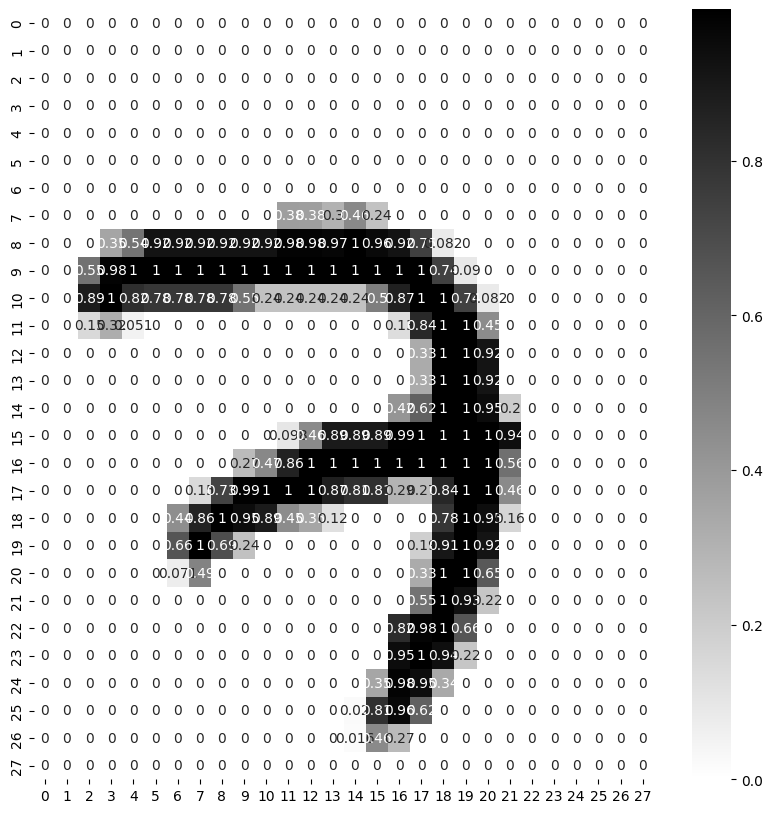

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(x_train[0],annot=True,cmap="binary")
plt.show()

In [12]:
# Creating layers of ANN
Layers = [tf.keras.layers.Flatten(input_shape=[28,28],name="inputLayer"),
          tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
          tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer2"),
          tf.keras.layers.Dense(10,activation="softmax",name="outputLayer")]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Flatten mean convert 2D to 1D (our pixcel image is 28x28 => to 784 (1D))
# First hidden layer with 300 neurons And Activation function relu- Introduce nonlinearity. Why 300? First hidden layer with 300 neurons.
# Second hidden layer with 100 neurons.  learned from the previous layer, enabling deeper understanding.
# Output layer with 10 neurons, each representing one digit class (0 to 9). Softmax convert raw scores into probabilitiessumming tp 1

In [13]:
model_clf = tf.keras.models.Sequential(Layers)
# Sequential - groups a linear stack of layers

In [14]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

| Layer      | Weights             | Biases | Total       |
| ---------- | ------------------- | ------ | ----------- |
| Dense(300) | 784 × 300 = 235,200 | 300    | **235,500** |
| Dense(100) | 300 × 100 = 30,000  | 100    | **30,100**  |
| Dense(10)  | 100 × 10 = 1,000    | 10     | **1,010**   |
| **Total**  |                     |        | **266,610** |


In [15]:
model_clf.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

# SDE

In [16]:
Loss_function = "sparse_categorical_crossentropy"
# FOR LOSS FUNCTION use : tf.losses.SparseCategoricalCrossentropy()

Optimizer = "SGD"
# FOR Optimizer use: tf.keras.optimizers.Adam()

Metrics = ["accuracy"]

# Hyperparameter Tuning
model_clf.compile(loss=Loss_function,optimizer=Optimizer,metrics=Metrics)

In [18]:
# In neural network at iteration we can check the error and we can learn from it
EPOCHS = 5
VALIDATION_SET = (x_valid,y_valid)
history = model_clf.fit(x_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9183 - loss: 0.2856 - val_accuracy: 0.9358 - val_loss: 0.2278
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9337 - loss: 0.2359 - val_accuracy: 0.9422 - val_loss: 0.2010
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9456 - loss: 0.1921 - val_accuracy: 0.9534 - val_loss: 0.1712
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9504 - loss: 0.1749 - val_accuracy: 0.9602 - val_loss: 0.1532
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9572 - loss: 0.1533 - val_accuracy: 0.9630 - val_loss: 0.1408


# ADAM

In [19]:
Loss_function = "sparse_categorical_crossentropy"
# FOR LOSS FUNCTION use : tf.losses.SparseCategoricalCrossentropy()

adam_optm = tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.94
)

Metrics = ["accuracy"]

# Hyperparameter Tuning
model_clf.compile(loss=Loss_function,optimizer=adam_optm,metrics=Metrics)

In [20]:
EPOCHS = 5
VALIDATION_SET = (x_valid,y_valid)
history = model_clf.fit(x_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8881 - loss: 0.4368 - val_accuracy: 0.9370 - val_loss: 0.2236
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9478 - loss: 0.1866 - val_accuracy: 0.9546 - val_loss: 0.1900
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9571 - loss: 0.1612 - val_accuracy: 0.9548 - val_loss: 0.1762
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9625 - loss: 0.1414 - val_accuracy: 0.9610 - val_loss: 0.1466
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9637 - loss: 0.1384 - val_accuracy: 0.9654 - val_loss: 0.1403


# RMS Prop

In [21]:
Loss_function = "sparse_categorical_crossentropy"
# FOR LOSS FUNCTION use : tf.losses.SparseCategoricalCrossentropy()

RMS_optm = tf.keras.optimizers.RMSprop(
    learning_rate=0.01,
    rho=0.94)

Metrics = ["accuracy"]

# Hyperparameter Tuning
model_clf.compile(loss=Loss_function,optimizer=RMS_optm,metrics=Metrics)

In [22]:
EPOCHS = 5
VALIDATION_SET = (x_valid,y_valid)
history = model_clf.fit(x_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32)

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9730 - loss: 0.1153 - val_accuracy: 0.9680 - val_loss: 0.2009
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9756 - loss: 0.1179 - val_accuracy: 0.9636 - val_loss: 0.2170
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9776 - loss: 0.1146 - val_accuracy: 0.9656 - val_loss: 0.3066
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9731 - loss: 0.1419 - val_accuracy: 0.9678 - val_loss: 0.3212
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9757 - loss: 0.1380 - val_accuracy: 0.9630 - val_loss: 0.3775


In [23]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.973382,0.122111,0.9680,0.200949
1,0.974982,0.128695,0.9636,0.216951
2,0.975055,0.130399,0.9656,0.306616
3,0.972655,0.146190,0.9678,0.321158
4,0.973600,0.150429,0.9630,0.377480


In [ ]:
# Example usage in Keras (conceptual)
# model.compile(optimizer='rmsprop', loss='...', metrics=['...'])
# model.fit(x_train, y_train, epochs=...)